# <div style="text-align: center;">FUTURE INTERNS INTERNSHIP TASK 1</div>

## Project description
In this project, I focus on analyzing the Titanic dataset to explore factors that influenced passenger survival during the disaster. Key steps include exploratory data analysis, data cleaning, and visualizations. The analysis examines the impact of features like gender, class, age, and fare on survival rates. A logistic regression model is then applied to predict survival outcomes.

## Dataset variables
The Titanic dataset consists of several features such as:

- **PassengerId**: Unique ID for each passenger.
- **Survived**: Survival status (0 = No, 1 = Yes).
- **Pclass**: Passenger class (1 = First, 2 = Second, 3 = Third).
- **Name**: Passenger's name.
- **Sex**: Gender of the passenger.
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings or spouses aboard the Titanic.
- **Parch**: Number of parents or children aboard the Titanic.
- **Ticket**: Ticket number.
- **Fare**: Ticket fare.
- **Cabin**: Cabin number.
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).


## Importing libraries

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

## Data exploration

In [149]:
#Load the data
df = pd.read_csv("train.csv")

In [150]:
#View the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
#View the last five rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [152]:
#Dimensions of the dataset
df.shape

(891, 12)

The dataset has 891 rows and 12 columns. 

In [153]:
#A short summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
#Data types of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data cleaning

In [155]:
#Duplicated values
df.duplicated().sum()

0

The dataset doesn't contain any duplicated values.

In [157]:
#Null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Comments**<br>Three columns contain null values: <br>- "Age": 177<br>- "Cabin": 687<br>- "Embarked": 2

In [158]:
#The percentage of null values in each columns
((df.isna().sum())/(len(df)))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Comments**<br>-"Age": we have about 19.87% of missing values, this is significant. We'll proceed by imputation with the mean.<br>-"Cabin": we have about 77.10% of missing values, this is very high. We'll then drop this column.<br>-"Embarked": we have about 0.22% of missing values, this is small. We'll proceed by imputation with the mode(because of its object type).

In [159]:
data_cleaned = df.copy()

In [160]:
#Imputation
data_cleaned["Age"] = data_cleaned["Age"].fillna(data_cleaned["Age"].median())
data_cleaned["Embarked"] = data_cleaned["Embarked"].fillna(data_cleaned["Embarked"].mode()[0])
#Dropping
data_cleaned = data_cleaned.drop(columns=["Cabin"], errors='ignore')

In [161]:
#Checking the new updates
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


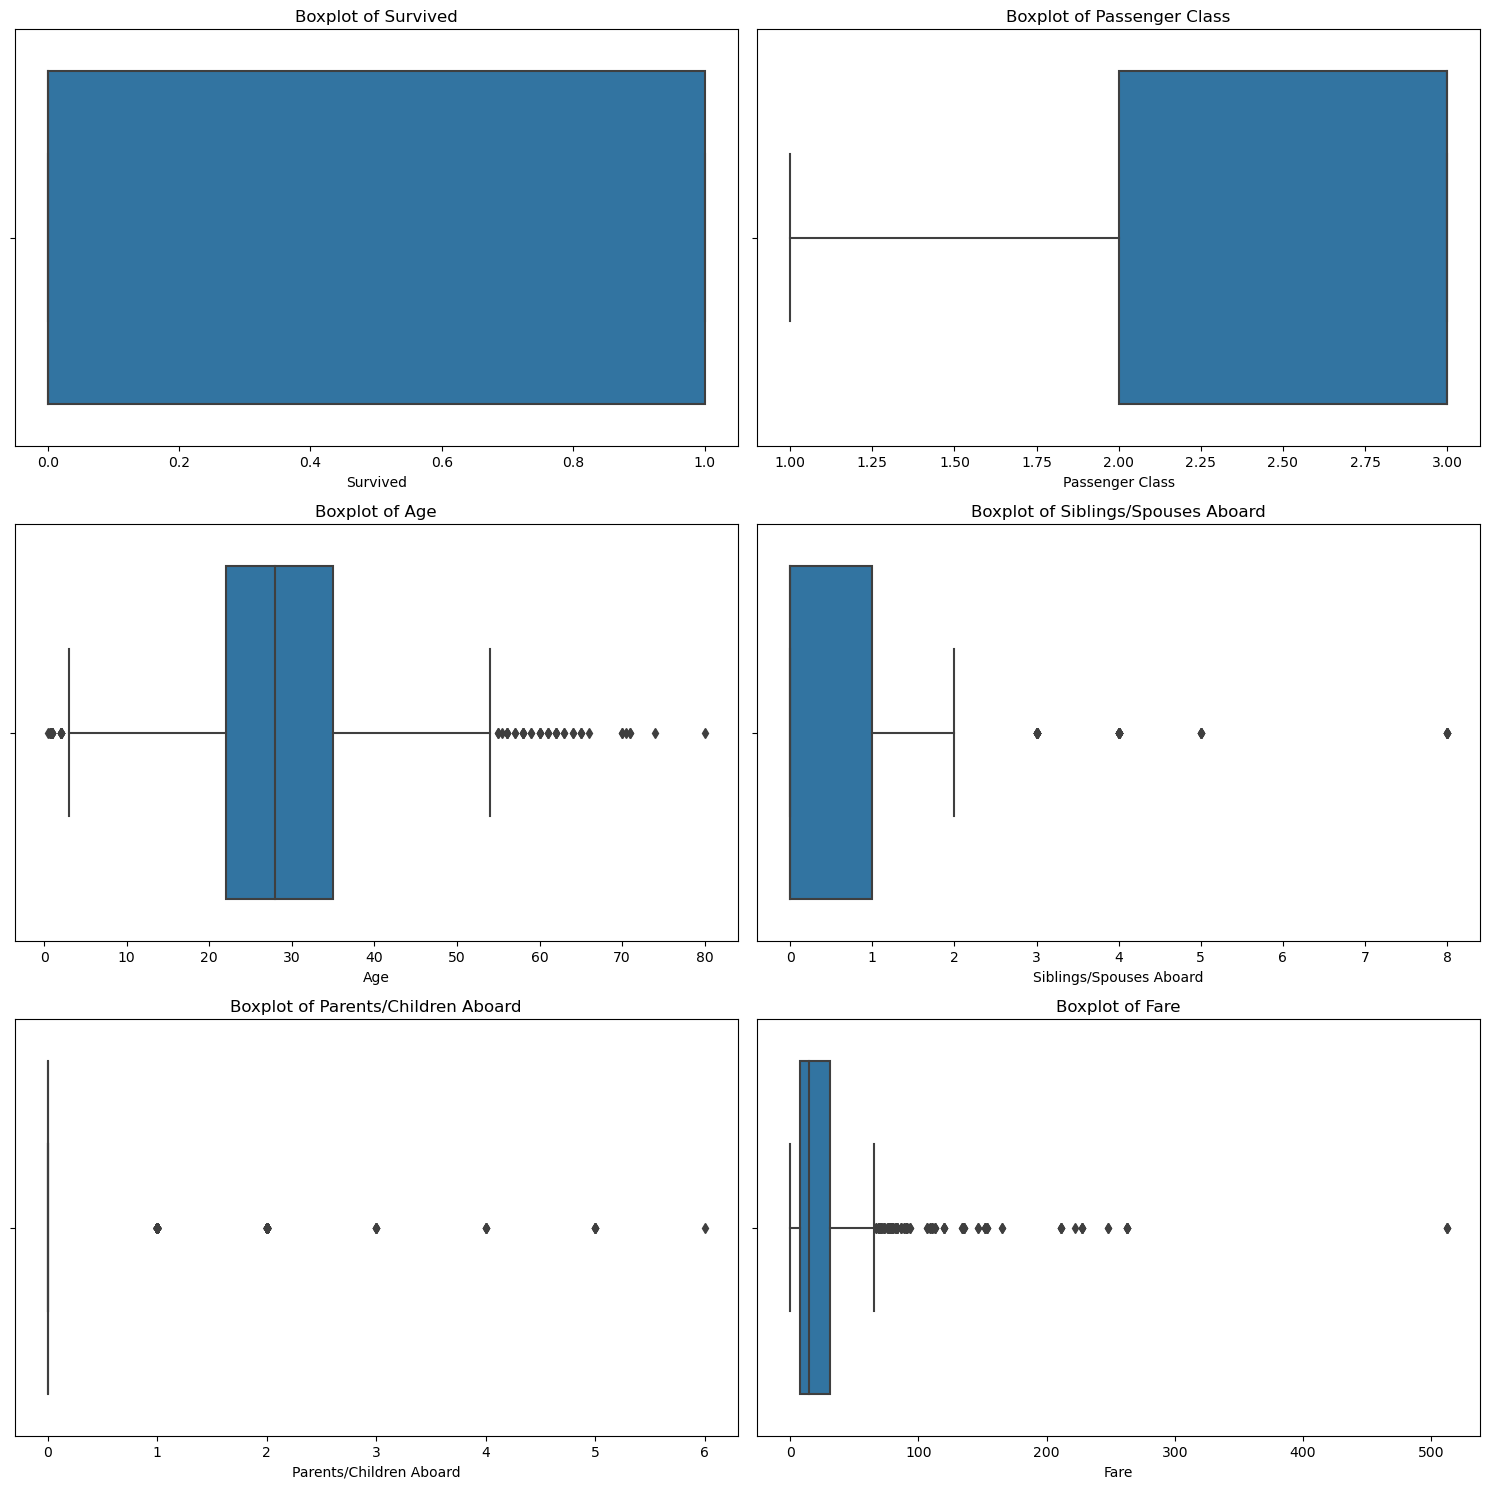

In [162]:
#Checking outliers in the numeric columns
columns = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
labels = ["Survived", "Passenger Class", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    sns.boxplot(x=data_cleaned[columns[i]], ax=ax)
    ax.set_title("Boxplot of {}".format(labels[i]))
    ax.set_xlabel(labels[i])

plt.tight_layout()
plt.show()

**Comments**<br>-The "Survived" and "Pclass" columns don't have outliers because they contain different categories of values.<br>-The "Age", "SibSp", and "ParCh" columns have significant number of outliers but we will keep them as they represent real world data.<br>-The fare column also have extreme outliers, therfore we'll analyse them to resolve that issue.

In [163]:
#Solution for the "Fare" column outliers problem
len(data_cleaned[data_cleaned["Fare"]==0])

15

**We have fifteen lines where the fare is equal to zero, we'll solve that with imputation with the mean or median.**

In [164]:
#Descriptive statistics of the Fare values greater than 0.
sub_data_cleaned = data_cleaned[data_cleaned["Fare"]>0]
sub_data_cleaned["Fare"].describe()

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

According to the statistics, the best method might be to fill the 0 values with the median because using the mean might distort the data (the mean is significantly affected by outliers, leading to a biased imputation).

In [165]:
#Filling the 0 Fare values with the median and dropping the rows Fare was 512.
med = sub_data_cleaned["Fare"].median()
data_cleaned.loc[data_cleaned["Fare"] == 0, "Fare"] = med
data_cleaned = data_cleaned[data_cleaned["Fare"] != 512.3292]

In [166]:
#Checking the data infos again.
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.2+ KB


**Now we have the cleaned dataframe "data_cleaned" but we still keep the principal dataframe named "df".**

## Data visualization

### We will now use visualization techniques to understand the relationships between different features.

#### Visualization of the categoricals columns

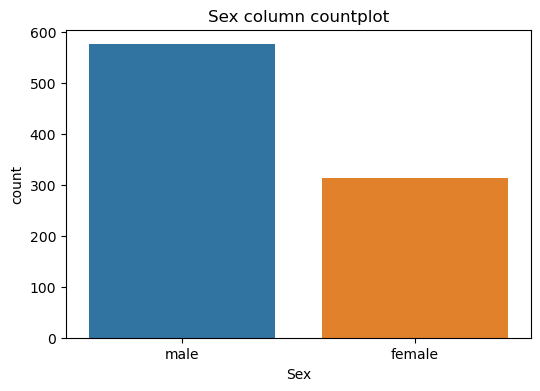

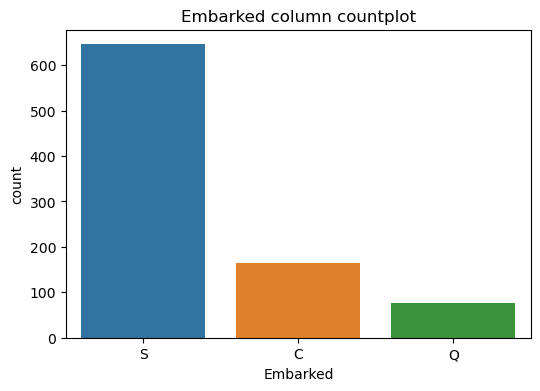

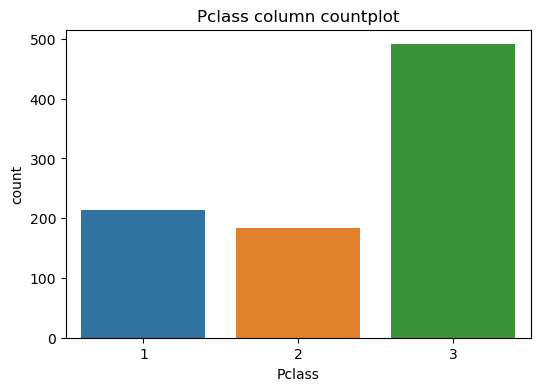

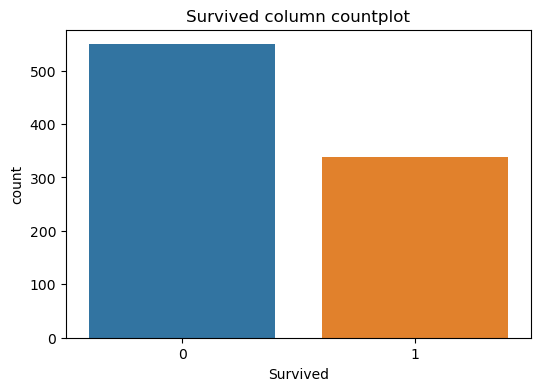

In [167]:
#Visualization of the categoricals columns in a qualitative way.
cat_cols = ['Sex', 'Embarked', 'Pclass', 'Survived']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data_cleaned[col])
    plt.title("{} column countplot".format(col))
    plt.show()

In [168]:
#Visualization of the categoricals columns in a quantitative way.
cat_cols = ['Sex', 'Embarked', 'Pclass', 'Survived']
for col in cat_cols:
    print("Percentage distribution in {} column:".format(col))
    print(data_cleaned[col].value_counts(normalize=True) * 100)  
    print("\n" + "-"*40 + "\n")

Percentage distribution in Sex column:
Sex
male      64.752252
female    35.247748
Name: proportion, dtype: float64

----------------------------------------

Percentage distribution in Embarked column:
Embarked
S    72.747748
C    18.581081
Q     8.671171
Name: proportion, dtype: float64

----------------------------------------

Percentage distribution in Pclass column:
Pclass
3    55.292793
1    23.986486
2    20.720721
Name: proportion, dtype: float64

----------------------------------------

Percentage distribution in Survived column:
Survived
0    61.824324
1    38.175676
Name: proportion, dtype: float64

----------------------------------------



**Comments**:<br>-There were more men than women among the passengers.<br>-The majority of passengers embarked from Southampton Port.<br>-The majority of passengers were in the third class, followed by the first and lastly the second class.<br>-Most passengers traveled in third class, followed by first class, with second class having the least representation.

#### Visualization of the numerical columns

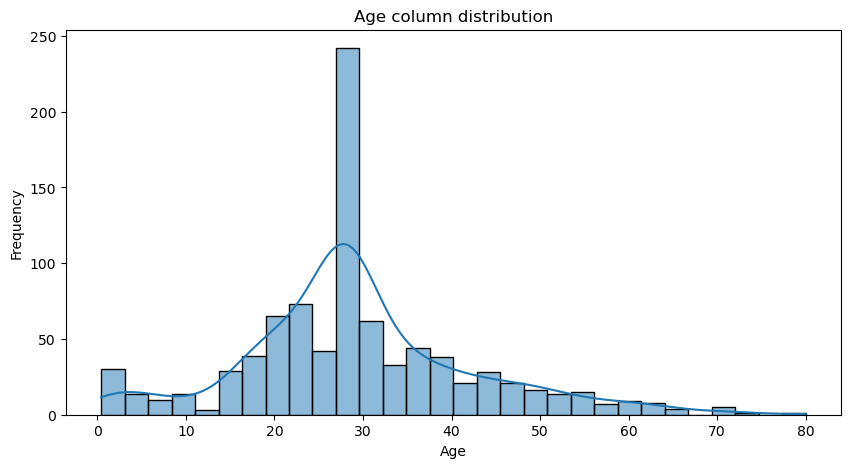

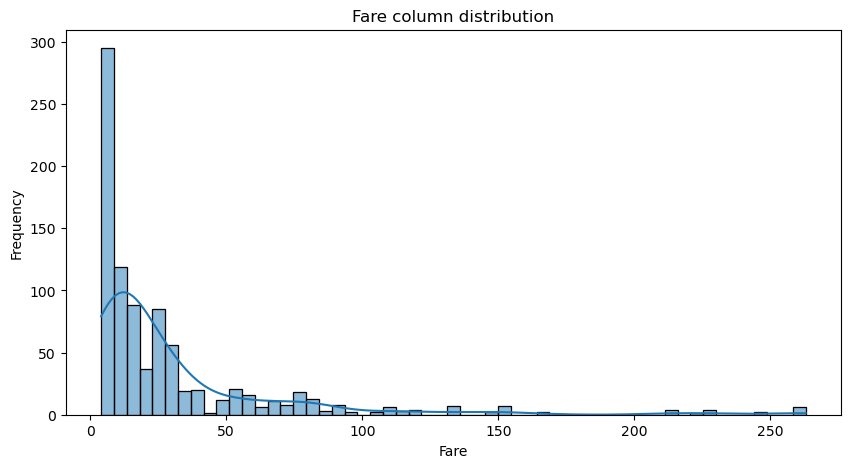

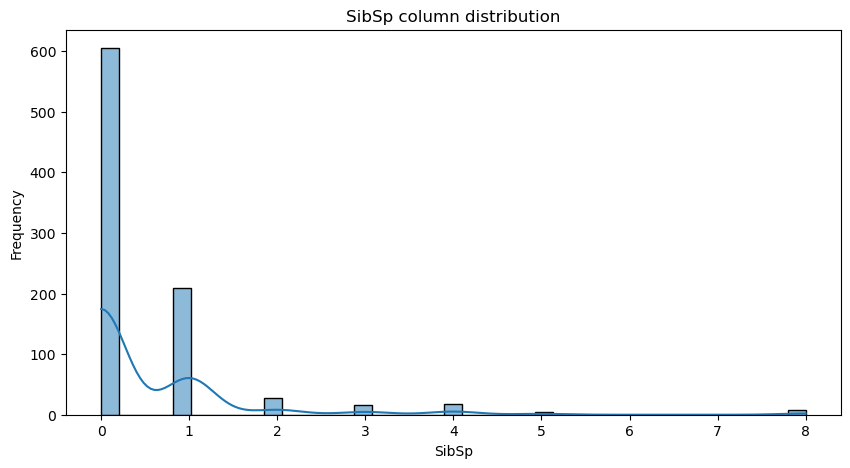

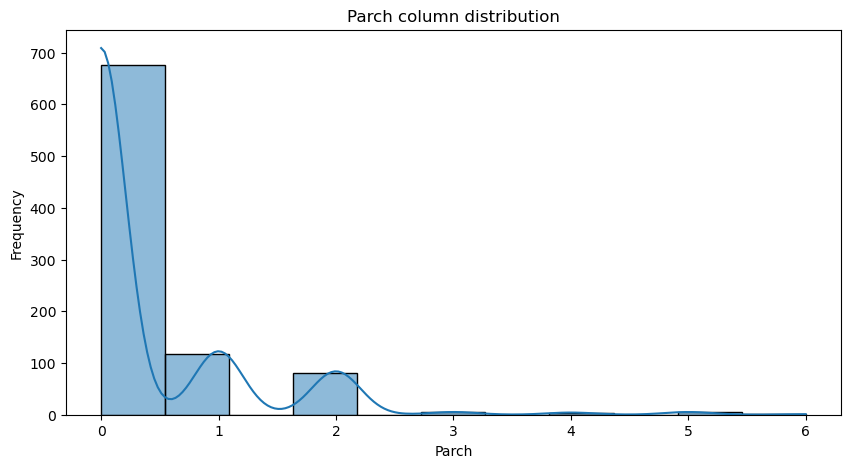

In [169]:
#Visualization of the numerical columns distributions
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=data_cleaned[col], kde=True)
    plt.title("{} column distribution".format(col))
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Comments**:<br>-The majority of passengers were aged between 18 and 33 years old.<br>-Most people that boarded paid less than 48 pounds for the fare.<br>-Most passengers did not have any parents or children accompanying them on board; however, some passengers traveled with one or two parents or children.

#### Visualization of the survival rate by gender

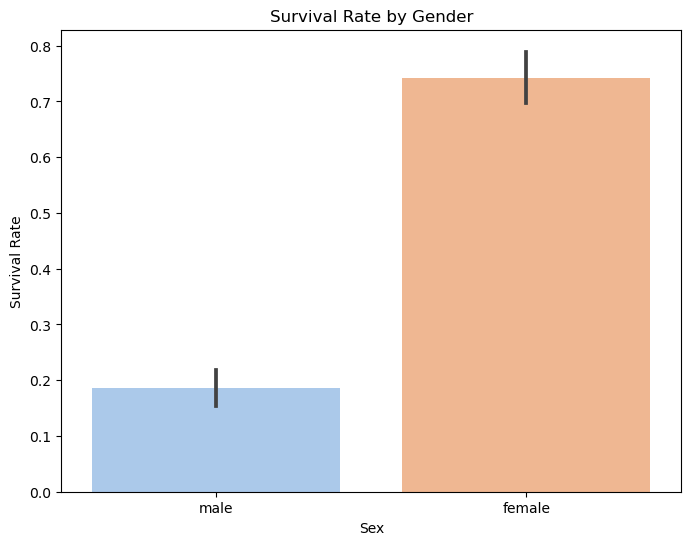

In [170]:
#Visualization of the survival rate by gender in a qualitative way.
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data_cleaned, palette='pastel')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

In [171]:
#Visualization of the survival rate by gender in a quantitative way.
data_cleaned.groupby("Sex")["Survived"].value_counts(normalize=True)*100

Sex     Survived
female  1           74.121406
        0           25.878594
male    0           81.391304
        1           18.608696
Name: proportion, dtype: float64

Based on the statistics and the graph, the majority of deaths occurred among men, while most women survived.

#### Survival Rate by Passenger Class

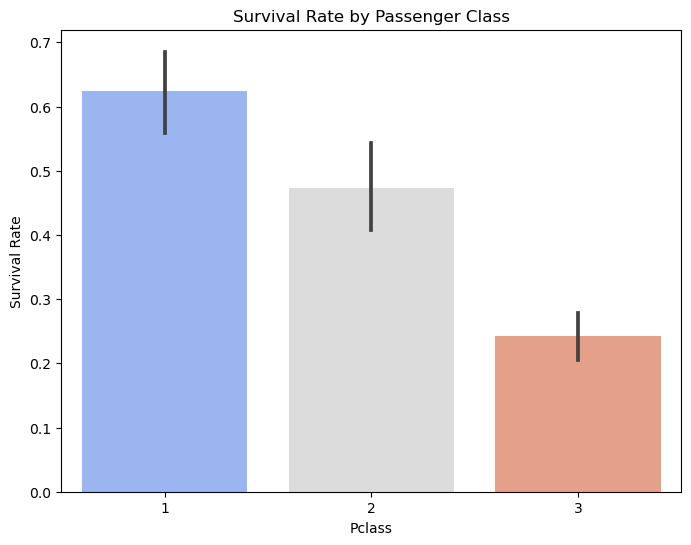

In [172]:
#Visualization of the survival rate by Passenger class in a qualitative way.
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data_cleaned, palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [173]:
#Visualization of the survival rate by Passenger class in a quantitative way.
data_cleaned.groupby("Pclass")["Survived"].value_counts(normalize=True)*100

Pclass  Survived
1       1           62.441315
        0           37.558685
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64

Based on the statistics and the graph, most survivors were from the first class, followed by the second class, and then the third class.

#### Survival Rate by place of Embarkation

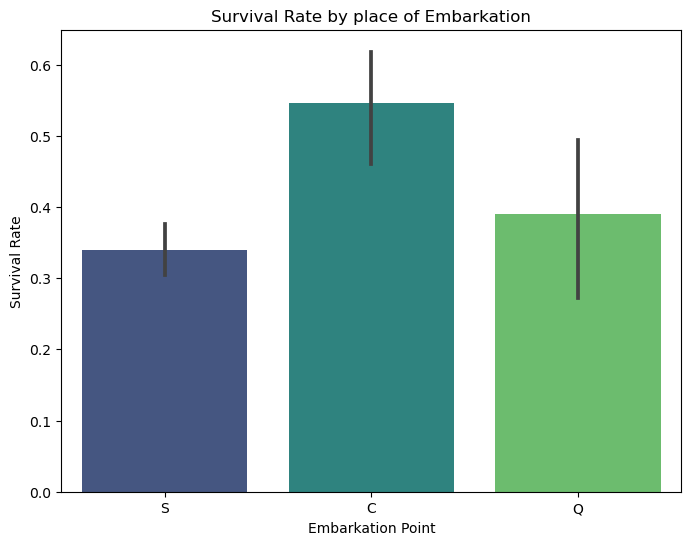

In [174]:
#Visualization of the survival rate by place of embarkation in a qualitative way.
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=data_cleaned, palette='viridis')
plt.title('Survival Rate by place of Embarkation')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

In [175]:
#Visualization of the survival rate by place of embarkation in a quantitative way.
data_cleaned.groupby("Embarked")["Survived"].value_counts(normalize=True)*100

Embarked  Survived
C         1           54.545455
          0           45.454545
Q         0           61.038961
          1           38.961039
S         0           66.099071
          1           33.900929
Name: proportion, dtype: float64

Based on the statistics, most survivors embarked at Cherbourg followed by Queenstown and then from Southampton.

## Logistic Regression model

In [176]:
#Creating a new dataframe to build the model
data = data_cleaned.drop(columns=["Name","Sex","Ticket","Embarked"])
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [177]:
#Model creation
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), data['Survived'], test_size=0.30, random_state=101)
model.fit(X_train,y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
#Model metrics
preds = model.predict(X_test)
matrix = confusion_matrix(y_test,preds)
print(matrix)
print("-"*40)
acc = accuracy_score(y_test,preds)
print(acc)

[[137  18]
 [ 67  45]]
----------------------------------------
0.6816479400749064


In [180]:
#Model evaluation
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       155
           1       0.71      0.40      0.51       112

    accuracy                           0.68       267
   macro avg       0.69      0.64      0.64       267
weighted avg       0.69      0.68      0.66       267



**Insights**<br>The model performs relatively well for predicting non-survivors with high precision, recall, and F1-score. It correctly identifies most of the non-survivors but it has significant difficulty predicting survivors. This indicates a considerable number of actual survivors are being misclassified as non-survivors.<br>The overall accuracy of 71% is decent.

## Conclusion

**1-Survival Rates:** the majority of passengers did not survive the disaster, with a survival rate of around 38%. The survival rate was particularly low among men, while women had a significantly higher chance of survival.<br><br>**2-Class Influence on Survival:** Passengers in the first class had the highest survival rates, followed by those in the second class, while third-class passengers faced the lowest chances of survival. This indicates a correlation between social status and survival.<br><br>**3-Fare and Embarkation:** Most passengers paid less than 48 pounds for their fare, with a large portion of passengers embarking from Southampton. Passengers who paid higher fares (often first-class passengers) had better survival outcomes, underscoring the impact of wealth on survival.<br><br>**4-Family Accompaniment:** A majority of passengers did not have any siblings, spouses, parents, or children with them on board, though some had one or two family members. Having family aboard did not appear to significantly affect survival chances.<br><br>**5-Logistic Regression Performance:** The model achieved 71% accuracy but struggled with predicting survivors, showing lower recall for class 1. It performed better at predicting non-survivors, likely due to class imbalance. Improving feature representation or applying class balancing methods could enhance performance.<br><br><br>**In conclusion, the analysis reveals that survival on the Titanic was strongly influenced by gender, class, and socioeconomic factors.**